In [ ]:
# 1 base de datos descargada o previamente conseguida ( de investing, a ver si podemos sacarla )
# 2 base de datos con webscrapping o api ( )

#1º lista de precios de los ultimos 6 meses, con maximo y minimo diario ideal con selenium poder preguntar sobre qué stock
# 2º algo que pueda tener incidencia, de la pagina de noticias, seleccionar ultimos 6 meses y quedarnos con las de una carácteristica

In [1]:
import pandas as pd
import os
import numpy as np
import requests
from dotenv import load_dotenv
from bs4 import BeautifulSoup
import selenium
from selenium import webdriver
import time



In [3]:

# elegimos con qué vamos a navegar, una vez hecho esto se nos abre una ventana de Chrome en este caso que nos advierte de que 
# algún programa maneja nuestro navegador, y en esa ventana se ejecutarán las acciones que vamos a ir haciendo.
# https://www.selenium.dev/documentation/es/getting_started/
driver = webdriver.Chrome()
driver.implicitly_wait(10)




In [3]:
urlprevia = "https://www.investing.com/equities/facebook-inc"
html = driver.get(urlprevia)
time.sleep (5)


In [9]:
# aqui estamos aceptamos las cookies, he intentado primero por nombre, con find element by link text, pero daba error, asi que 
# he buscado la id y la he pegado
url= driver.find_element_by_id("onetrust-accept-btn-handler").click() 
time.sleep (2)

ElementNotInteractableException: Message: element not interactable
  (Session info: chrome=89.0.4389.114)


In [8]:
#una vez en la ventana de Facebook, tenemos que irnos a historial data, que es lo que nos interesa:
driver.find_element_by_xpath("/html/body/div[1]/div/div/div[2]/main/div/div[3]/nav/ul/li[3]/a").click()
# después de varias pruebas fallidas, búsqueda por xpath y copiar directamente la ruta, con esto hemos clickado en historial data,
time.sleep (35)#vamos a darle tiempo, porque después de esto salta publicidad...

NoSuchElementException: Message: no such element: Unable to locate element: {"method":"xpath","selector":"/html/body/div[1]/div/div/div[2]/main/div/div[3]/nav/ul/li[3]/a"}
  (Session info: chrome=89.0.4389.114)


In [10]:
#driver.find_element_by_xpath ("/html/body/div[6]/div[2]/i").click() #cerramos ventana de inicio sesion
time.sleep (2)
# OJO, ESTO TENGO QUE METERLO EN UN ERROR; PERO UWE SIGA RULANDO

ElementNotInteractableException: Message: element not interactable
  (Session info: chrome=89.0.4389.114)


In [11]:
#ahora tenemos que seleccionar el rango de fechas que queremos, por defecto viene un mes, y nos interesan 6 meses.
driver.find_element_by_xpath ("/html/body/div[5]/section/div[8]/div[3]/div/div[1]/div[1]/div").click()
#abro calendario
time.sleep (1)

In [12]:
# despues de intentarlo con datetime para crear una variable que sea la fecha menos 6 meses, me da error al rellenar con send_key
# porque lo que se pega es en formato datetime y el campo pide (dd/mm/yyyy), lo podría meter a mano, pero mejor coger una fecha
# que seguro que incluya el rango buscado y así tengo algo que limpiar en los df, porque voy a obtener todo bastante limpio ( si me sale bien)
driver.find_element_by_xpath ("/html/body/div[7]/div[2]/div/a[1]/span").click()
driver.find_element_by_xpath ("/html/body/div[7]/div[2]/div/a[1]/span").click()
driver.find_element_by_xpath ("/html/body/div[7]/div[2]/div/a[1]/span").click()
driver.find_element_by_xpath ("/html/body/div[7]/div[2]/div/a[1]/span").click()
driver.find_element_by_xpath ("/html/body/div[7]/div[2]/div/a[1]/span").click() #5 clicks para que vaya corriendo mes en el calendario



In [13]:
driver.find_element_by_xpath ("/html/body/div[7]/div[2]/table/tbody/tr[1]/td[4]/a").click () #click en el dia 1
# se nos mueve todo el calendario, asi que ahora tenemos que volver a la fecha actual.

In [14]:
driver.find_element_by_xpath ("/html/body/div[7]/div[3]/div/a[2]/span").click()
driver.find_element_by_xpath ("/html/body/div[7]/div[3]/div/a[2]/span").click()
driver.find_element_by_xpath ("/html/body/div[7]/div[3]/div/a[2]/span").click()
driver.find_element_by_xpath ("/html/body/div[7]/div[3]/div/a[2]/span").click()
driver.find_element_by_xpath ("/html/body/div[7]/div[3]/div/a[2]/span").click()


In [15]:
driver.find_element_by_xpath ("/html/body/div[7]/div[3]/table/tbody/tr[3]/td[1]/a").click () #clikamos en fecha final

In [16]:
driver.find_element_by_xpath ("/html/body/div[7]/div[5]/a").click () #aplicamos cambios

In [13]:
# el siguiente problema va a ser la ruta de la descarga, ya que si la aplicamos directamente se nos va a ir a downloads y
# lo queremos en esta misma carpeta, o en carpeta data
#driver.find_element_by_xpath ("/html/body/div[5]/section/div[8]/div[4]/div/a").click ()

In [14]:
#driver.find_element_by_xpath ("/html/body/div[9]/div[2]/div[1]/div[2]/span[2]").click()
# y aqui chocamos contra un  muro, no deja seguir con google, ni descargar nada sin iniciar sesión.

In [18]:
datosfb= driver.find_element_by_xpath ("/html/body/div[5]/section/div[9]/table[1]/tbody") #cogemos la tabla con datos

In [19]:
#una vez seleccionado el body de la tabla, vamos a iterar por el cogiendo sus tr, filas y td, datos dentro de la fila
tabladatosfb=[]
for dato in datosfb.find_elements_by_tag_name("tr"):
    fila=[d for d in dato.find_elements_by_tag_name ("td")]
    if len (fila)>1 :
        dia= {
            "Fecha": fila[0].text,
            "Close": fila[1].text,
            "Open": fila[2].text,
            "Max": fila [3].text,
            "Min": fila [4].text,
            "Vol": fila [5].text,
            "Var": fila [6].text
             }
        tabladatosfb.append (dia)
        time.sleep (10)

In [20]:
df = pd.DataFrame(tabladatosfb)

In [21]:
df.to_csv (r"Data/facebook.csv")
driver.close()

In [18]:
#ahora vamos a ver si puedo meter esto en funciones y guardarlo en un py

In [19]:
# primer data scrapeado, vamos con el segundo


[]

In [1]:
import pandas as pd
resultados = pd.read_csv (r'Data\resultados.csv')

In [2]:
resultados.head ()

,Publicacion,;Periodo,BPA,;BPA_esperado,;Ingresos,;Ingresos_esperados
0,01/07/2021,01/06/2021,---,2.49,---,25.3B;;;;
1,28/04/2021,01/03/2021,---,2.34,---,23.6B;;;;
2,27/01/2021,01/12/2020,3.88,3.19,28.07B,26.36B;;;;
3,29/10/2020,01/09/2020,2.71,1.90,21.47B,19.8B;;;;
4,30/06/2020,01/06/2020,1.80,1.39,18.69B,17.403B;;;;


In [3]:
resultados.columns = [col.replace(";", "") for col in resultados.columns]

In [4]:
historico = pd.read_csv (r'Data\facebook.csv')

In [5]:
import datetime
resultados["Publicacion"]= pd.to_datetime(resultados.Publicacion)
historico ["Fecha"] = pd.to_datetime (historico.Fecha)

In [6]:
resultados ["Fecha"]=resultados ["Publicacion"]

In [7]:
historico.drop (["Unnamed: 0"], axis=1, inplace=True)

In [8]:
historico ["var_intra"]= historico.Max - historico.Min

In [9]:
historico ["volatilidad"]= ((historico.var_intra *100)/ historico.Close).round(2)

In [10]:
historico.set_index("Fecha", drop=False, inplace=True)

In [11]:
resultados.set_index("Publicacion", drop=False, inplace=True)

In [21]:
dff= historico.join (resultados, lsuffix='idx', rsuffix='idx')

In [22]:
dff.sample(10)

,Fechaidx,Close,Open,Max,Min,Vol,Var,var_intra,volatilidad,Publicacion,Periodo,BPA,BPA_esperado,Ingresos,Ingresos_esperados,Fechaidx
Fecha,,,,,,,,,,,,,,,,
2020-11-11,2020-11-11,276.48,273.50,278.38,272.99,14.96M,1.49%,5.39,1.95,NaT,NaN,NaN,NaN,NaN,NaN,NaT
2020-12-04,2020-12-04,279.70,280.30,283.46,279.30,10.88M,-0.76%,4.16,1.49,NaT,NaN,NaN,NaN,NaN,NaN,NaT
2021-03-16,2021-03-16,279.28,275.40,282.10,275.00,22.44M,2.02%,7.10,2.54,NaT,NaN,NaN,NaN,NaN,NaN,NaT
2020-11-03,2020-11-03,265.30,263.16,270.05,260.88,17.84M,1.51%,9.17,3.46,NaT,NaN,NaN,NaN,NaN,NaN,NaT
2021-01-08,2021-01-08,267.57,268.31,268.95,263.18,18.53M,-0.44%,5.77,2.16,NaT,NaN,NaN,NaN,NaN,NaN,NaT
2020-12-28,2020-12-28,277.00,268.88,277.27,265.73,23.30M,3.59%,11.54,4.17,NaT,NaN,NaN,NaN,NaN,NaN,NaT
2021-03-10,2021-03-10,264.90,268.53,268.73,262.90,14.21M,-0.32%,5.83,2.20,NaT,NaN,NaN,NaN,NaN,NaN,NaT
2021-03-09,2021-03-09,265.74,260.34,268.51,259.81,22.04M,4.09%,8.70,3.27,NaT,NaN,NaN,NaN,NaN,NaN,NaT
2021-02-25,2021-02-25,254.69,262.54,266.92,254.04,19.05M,-3.64%,12.88,5.06,NaT,NaN,NaN,NaN,NaN,NaN,NaT


In [23]:
dff.drop ([" BPA_esperado", "BPA", "Ingresos", "Ingresos_esperados", "Periodo"], axis=1, inplace=True)

In [17]:
dff.columns

Index(['Fechaidx', 'Close', 'Open', 'Max', 'Min', 'Vol', 'Var', 'var_intra',
       'volatilidad', 'Publicacion', 'Fechaidx'],
      dtype='object')

In [24]:
dff.drop (["Fechaidx", "Open", "Max", "Min", "Fechaidx" ], axis=1, inplace=True)

In [53]:
dff.sample(50)

,Fecha,Close,Vol,Var,var_intra,volatilidad,Publicacion
3,2021-04-07,313.09,22.86M,2.23%,8.55,2.73,0
22,2021-03-10,264.90,14.21M,-0.32%,5.83,2.20,0
99,2020-11-16,278.96,12.97M,0.73%,4.35,1.56,0
110,2020-10-30,263.11,47.30M,-6.31%,17.60,6.69,0
92,2020-11-25,275.59,12.47M,-0.48%,7.53,2.73,0
60,2021-01-13,251.64,19.53M,0.22%,4.64,1.84,0
87,2020-12-03,281.85,12.92M,-1.97%,5.48,1.94,0
53,2021-01-25,278.01,19.09M,1.28%,8.29,2.98,0
51,2021-01-27,272.14,35.35M,-3.51%,15.03,5.52,2021-01-27 00:00:00
129,2020-10-05,264.65,12.82M,1.81%,4.03,1.52,0


In [26]:
dff= dff.fillna(0)

In [28]:
dff.reset_index (inplace=True)


In [29]:
buscando_datos = dff.loc[:, "Publicacion"] != 0
fechas = dff.loc[buscando_datos]
fechas

,Fecha,Close,Vol,Var,var_intra,volatilidad,Publicacion
51,2021-01-27,272.14,35.35M,-3.51%,15.03,5.52,2021-01-27 00:00:00
64,2021-01-07,268.74,15.79M,2.06%,6.75,2.51,2021-01-07 00:00:00
111,2020-10-29,280.83,32.37M,4.92%,9.82,3.50,2020-10-29 00:00:00


In [39]:
dfrango20a=dff.iloc[31: 41] 
dfrango20b=dff.iloc[54: 69]
dfrango20c=dff.iloc[101: 121] 

In [40]:
import numpy as np
import matplotlib.pyplot as plt

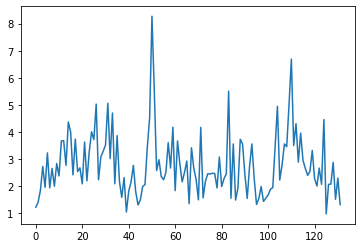

In [55]:
#plt.plot(2,3, marker="o", color="red")
volatilidad=plt.plot (dff.volatilidad )
plt.savefig("volatilidad.jpg")

In [ ]:
#volatilidad en el dia
#volatilidad en los dias previos, media
#volatilidad en los dias posteriores, media
# variacion de precio en los dias previos y posteriores, rango 5 dias antes y 5 despues
# y comparado todo con las medias de historico

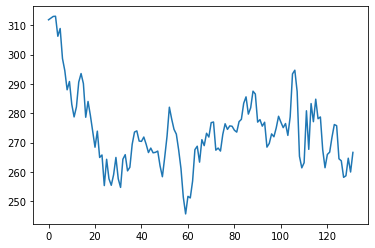

In [56]:
precio=plt.plot (dff.Close)
plt.savefig("precio.jpg")

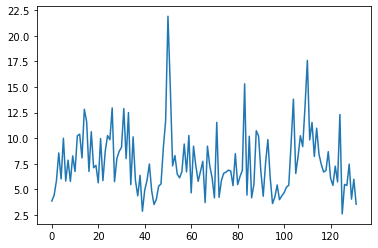

In [57]:
var_intra=plt.plot (dff.var_intra)
plt.savefig("var_intra.jpg")

In [61]:
var=plt.plot (dff.Var)
plt.savefig ("var.jpg")

TypeError: Could not convert -0.19%-0.18%-0.02%2.23%-0.86%3.43%1.40%2.27%-0.97%2.76%1.54%-1.21%-2.92%-0.99%1.18%4.12%-1.90%1.69%2.02%1.99%-2.00%3.39%-0.32%4.09%-3.39%2.58%0.87%-1.39%-2.23%2.83%1.15%-3.64%-0.58%2.12%-0.47%-2.91%-1.53%-0.15%1.28%0.04%-0.54%0.90%1.08%-0.57%0.60%-0.06%-0.16%1.94%1.42%-2.52%-2.62%-3.51%1.45%1.28%0.60%2.02%2.44%3.87%2.33%-2.38%0.22%-2.24%-4.01%-0.44%2.06%-2.83%0.75%-1.54%0.47%-1.77%-0.08%3.59%-0.26%0.38%-2.09%-1.31%0.70%-0.43%0.04%0.50%0.23%-1.29%-0.29%-1.93%-0.76%2.10%-0.76%-1.97%0.34%3.46%-0.30%0.81%-0.48%3.16%-0.47%-1.19%0.36%-1.10%-1.42%0.73%0.68%-0.51%1.49%-2.27%-4.99%-0.43%2.54%8.32%1.51%-0.67%-6.31%4.92%-5.51%2.23%-2.70%2.40%-0.22%4.17%2.36%-1.70%-0.30%-1.88%-1.56%0.14%4.27%0.26%2.19%-0.21%-2.26%1.81%-2.51%1.81% to numeric